# Perceptron

In [1]:
from random import choice
from numpy import array, dot, random

In [2]:
%matplotlib inline

Step function:

In [4]:
unit_step = lambda x: 0 if x < 0 else 1

Training data:
$x_1$, $x_2$, $y$, bias

In [5]:
training_data = [
    (array([0,0,1]), 0),
    (array([0,1,1]), 1),
    (array([1,0,1]), 1),
    (array([1,1,1]), 1),
]


Selection of initial values:

In [7]:
w = random.rand(3)

errors store the error for each epoch
eta controls the learning rate
n specify the number of iterations

In [8]:
errors = []
eta = 0.2
n = 100

In order to find the ideal values for the weights w, we try to reduce the error magnitude to zero. In this simple case n = 100 iterations are enough; for a bigger and possibly "noisier" set of input data much larger numbers should be used.

First we get a random input set from the training data. Then we calculate the dot product (sometimes also called scalar product or inner product) of the input and weight vectors. This is our (scalar) result, which we can compare to the expected value. If the expected value is bigger, we need to increase the weights, if it's smaller, we need to decrease them. This correction factor is calculated in the last line, where the error is multiplied with the learning rate (eta) and the input vector (x). It is then added to the weights vector, in order to improve the results in the next iteration.

In [9]:
for i in xrange(n):
    x, expected = choice(training_data)
    result = dot(w, x)
    error = expected - unit_step(result)
    errors.append(error)
    w += eta * error * x

And that's already everything we need in order to train the perceptron! It has now "learned" to act like a logical OR function:

In [11]:
for x, _ in training_data:
    result = dot(x, w)
    print("{}: {} -> {}".format(x[:2], result, unit_step(result)))


[0 0]: -0.0406892065216 -> 0
[0 1]: 0.24424880443 -> 1
[1 0]: 0.812255078752 -> 1
[1 1]: 1.0971930897 -> 1


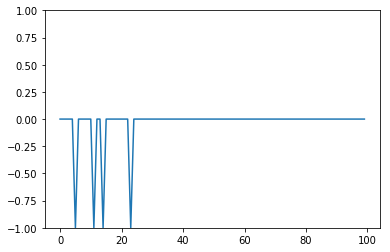

In [14]:
from pylab import plot, ylim
ylim([-1,1])
plot(errors)